## ASK joint: NicheNet preparations

In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import rcParams

# verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.verbosity = 3               
sc.logging.print_version_and_date()

# making sure plots & clusters are reproducible
np.random.seed(42)

# custom functions
import sc_toolbox as sct

Running Scanpy 1.8.2, on 2022-12-04 12:42.


In [2]:
## path variables
adata_dir = '/home/niklas/data/220107_Human_PCLS_ASK_joint/220107_PCLS_human_ASK_joint_annotated_NIKLAS.h5ad'
project_dir = '/home/niklas/projects/niche_environments_FIBROSIS/HUMAN_exvivo/01_data/NicheNet_inputs/'

In [3]:
## plotting variables
sc.settings.figdir = '/home/niklas/projects/niche_environments_FIBROSIS/PCLS_human/02_figures/ASK_joint/'
sc.set_figure_params(vector_friendly = True)
plt.rcParams['figure.figsize'] = (6, 5)
plt.rcParams['pdf.fonttype'] = 42

In [4]:
## load anndata object
adata = sc.read(adata_dir)

In [5]:
## have a look at the adata object
adata

AnnData object with n_obs × n_vars = 63581 × 17343
    obs: 'condition', 'modality', 'name', 'patient', 'timepoint', 'treatment', 'identifier', 'n_counts', 'n_genes', 'percent_mito', 'QC_group', 'doublet_scores', 'size_factors', 'leiden_1', 'leiden_2', 'cell_type', 'cell_type_group'
    var: 'n_cells', 'n_counts', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'cell_type_colors', 'cell_type_group_colors', 'condition_colors', 'dendrogram_cell_type', 'hvg', 'identifier_colors', 'leiden', 'leiden_1_colors', 'leiden_2_colors', 'modality_colors', 'name_colors', 'neighbors', 'patient_colors', 'pca', 'rank_genes_groups', 'treatment_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'unsouped_counts'
    obsp: 'connectivities', 'distances'

In [6]:
adata = adata[-adata.obs.treatment.isin(['CC'])]
adata = adata[adata.obs.cell_type.isin(['Aberrant Basaloid','ectopic EC','Myofibroblasts','Pericytes','Profibrotic Macrophages'])].copy()

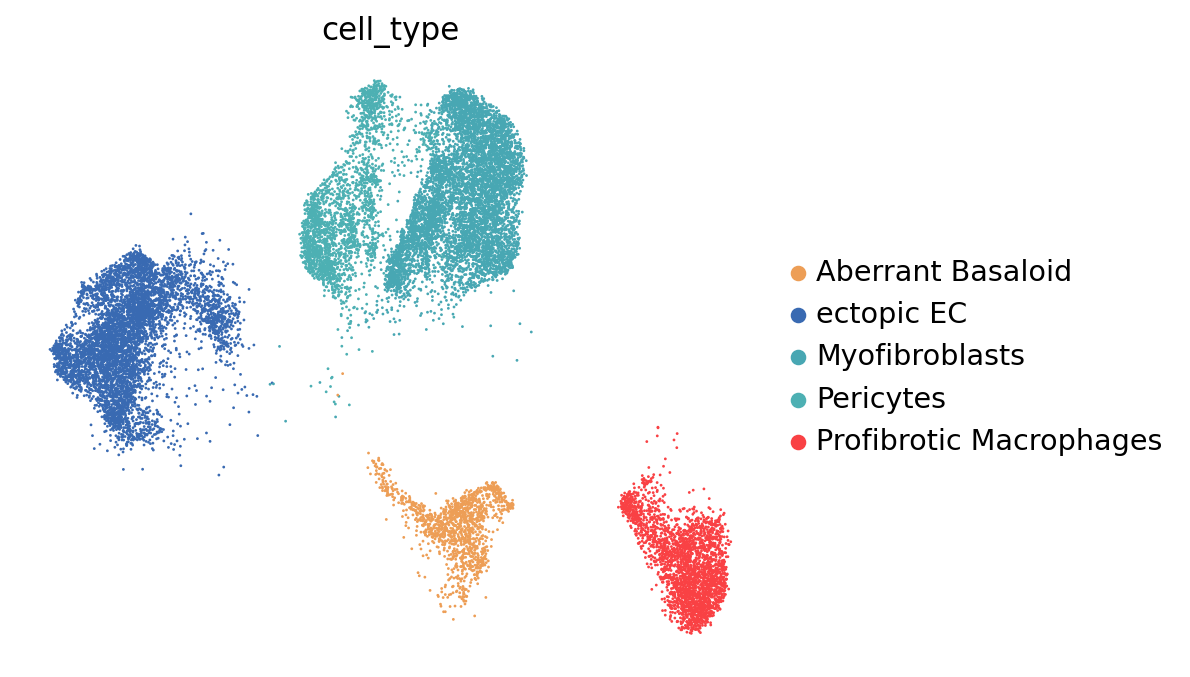

In [7]:
## overview UMAPs
sc.pl.umap(adata, color = ['cell_type'], ncols = 1, frameon = False)

### Calculate average expression table

In [8]:
## for each treatment separately - but always pooled with FC
for treatment in ['FC+CMP4','FC+Nintedanib']:
    adata_sub = adata[adata.obs.treatment.isin(['FC',treatment])].copy()
    avg_expr_ct = pd.DataFrame(columns=adata_sub.var_names, index=adata_sub.obs['cell_type'].cat.categories)                                                                                                 
    for cell_type in adata_sub.obs.cell_type.cat.categories: 
        avg_expr_ct.loc[cell_type] = adata_sub[adata_sub.obs['cell_type'].isin([cell_type]),:].X.mean(0)
    avg_expr_ct = avg_expr_ct.transpose()
    avg_expr_ct_SCALED = avg_expr_ct.apply(lambda x:(x.astype(float) - min(x))/(max(x)-min(x)), axis = 1)
    avg_expr_ct.to_csv(project_dir + '221204_ASK_joint_Human_PCLS_FC_' + treatment + '_avg_expr_cell_type_level.csv')
    avg_expr_ct_SCALED.to_csv(project_dir + '221204_ASK_joint_Human_PCLS_FC_' + treatment + '_avg_expr_SCALED_cell_type_level.csv')

### Calculate pct expression tables

In [9]:
## for each treatment separately - but always pooled with CC
for treatment in ['FC+CMP4','FC+Nintedanib']:
    adata_sub = adata[adata.obs.treatment.isin(['FC',treatment])].copy()
    pct_expr_ct = pd.DataFrame(columns=adata_sub.raw.var_names, index=adata_sub.obs['cell_type'].cat.categories) 
    for cell_type in adata_sub.obs.cell_type.cat.categories:
        cells = adata_sub.obs_names[adata_sub.obs['cell_type'] == cell_type]
        pct_expr_ct.loc[cell_type] = (adata_sub.raw[cells].X > 0).sum(0) / adata_sub.raw[cells].X.shape[0]
    pct_expr_ct = pct_expr_ct.transpose()
    pct_expr_ct.to_csv(project_dir + '221204_ASK_joint_Human_PCLS_FC_' + treatment + '_pct_expr_cell_type_level.csv')